This script analyze the output of O3 box model with source apportionment technique. The goal of this script is to find the O3 contribution from different source of VOCs from the box model for Redlands, CA

In [131]:
import os, importlib, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import join, isfile
sys.path.insert(0, '../../code/src')
importlib.reload(sys.modules['box_model_source_apportionment'])
from box_model_source_apportionment import treat_box_model_output

In [132]:
df_all = pd.DataFrame(columns=['Date','Time','O3','O3_X1','O3_X2','O3_X3',
                                 'O3_X4','O3_X5','O3_X6',
                                 'O3_X7','O3_X8','O3_X9'])
folderpath = '../../data/intermediate/box_model_output_bgX/'
filelist = [f for f in listdir(folderpath) if 
            isfile(join(folderpath, f))]
filelist = [s for s in filelist if 'results' in s ]

for file in filelist:
    filepath = folderpath + file
    df = treat_box_model_output(filepath)
    df_all = pd.concat([df_all, df], ignore_index=True)
df_all.iloc[:,2:] = df_all.iloc[:,2:].astype(float)

In [115]:
df_O3_source_avg = pd.DataFrame(df_all[df_all['Time']==180].iloc[:,2:].mean(axis=0))
df_O3_source_avg.columns = ['Value']

# Subtract the initial O3 from final O3_vanilla
O3_init_avg = df_all[df_all['Time']==0].iloc[:,2:].mean(axis=0)[0]
df_O3_source_avg.iloc[0,0] = df_O3_source_avg.iloc[0,0] - O3_init_avg
#df_O3_source_avg.iloc[0,0] = 0

# calculate the percentage  to sum
df_O3_source_avg['Percentage'] = df_O3_source_avg['Value']/df_O3_source_avg['Value'].sum()*100

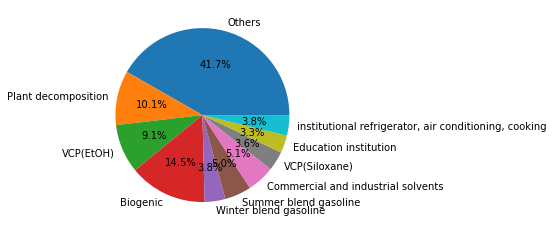

In [106]:
# make pie chart
fig, ax=plt.subplots(1)
labels = ['Others','Plant decomposition','VCP(EtOH)','Biogenic','Winter blend gasoline','Summer blend gasoline','Commercial and industrial solvents','VCP(Siloxane)','Education institution','institutional refrigerator, air conditioning, cooking']
ax.pie(df_O3_source_avg['Percentage'], labels=labels, autopct='%.1f%%')
fig.set_facecolor('white')


<AxesSubplot:xlabel='Date'>

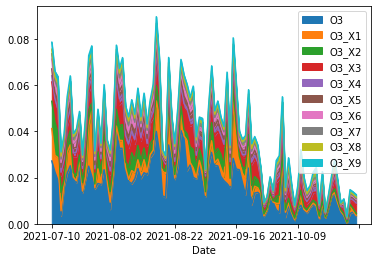

In [148]:
# plot stacked time series
df_plot = df_all.loc[df_all['Time']==180, ['Date','O3','O3_X1','O3_X2','O3_X3','O3_X4',
                      'O3_X5','O3_X6','O3_X7','O3_X8','O3_X9']].reset_index(drop=True)
df_plot['O3'] = df_plot['O3'] - df_all[df_all['Time']==0].reset_index()['O3']
df_plot = df_plot.set_index('Date')

df_plot.plot.area()

In [ ]:
# plot correctation table for each source
